<a href="https://colab.research.google.com/github/GitMishka/1/blob/main/Copy_of_10_5_2023_textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from google.colab import files

uploaded = files.upload()

file_name = "all_data.csv"


Saving all_data.csv to all_data.csv


In [ ]:
import pandas as pd
from textblob import TextBlob

df = pd.read_csv(file_name)

df = df.dropna(subset=["Q2 - What can we do better?"])
df

<ipython-input-12-6ad11901972d>:4: DtypeWarning: Columns (18,23,24,26,27,31,33,34,38,39,40,41,42,43,44,45,47,48,50,51,52,54,55,56,57,59,60,82,99,100,101,102,103,104,108,109,111,112,113,114,115,116,117,119,121,124,126,127,128,129,130,131,132,135,136,137,139,141,142,145,146,151,152,153,154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


,Survey Metadata - Start Date (+00:00 GMT),Survey Metadata - End Date (+00:00 GMT),Survey Metadata - Response Type,Survey Metadata - IP Address,Survey Metadata - Progress,Survey Metadata - Duration (in seconds),Survey Metadata - Finished,Survey Metadata - Recorded Date (+00:00 GMT),Contact Fields - Recipient Last Name,Contact Fields - Recipient First Name,...,Embedded Data - VOLUNTEER,Embedded Data - WorkPhone,Embedded Data - Zip,Embedded Data - Zip Code,_cachedDate (+00:00 GMT),_recordId,_recordedDate (+00:00 GMT),_sourceId,_sourceMapId,_sourceType
6,9/27/2023 0:28,9/27/2023 0:29,IP Address,104.7.38.236,100,44,True,9/27/2023 0:29,Romines,Mia,...,NaN,NaN,NaN,37804,9/28/2023 13:28,R_1C9CnWqIa0VstHS,9/27/2023 0:29,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
9,9/22/2023 23:55,9/22/2023 23:58,IP Address,174.202.68.49,100,138,True,9/22/2023 23:58,Hood,Sally,...,No,NaN,40475.0,46131,9/28/2023 13:28,R_b2vyy9BUq35Z9jX,9/22/2023 23:58,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
14,9/22/2023 15:12,9/22/2023 15:12,IP Address,166.199.229.11,100,29,True,9/22/2023 15:12,Travis,Elizabeth,...,NaN,NaN,NaN,40330,9/28/2023 13:28,R_yvCjgrUMiXEpGNz,9/22/2023 15:12,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
24,9/21/2023 22:34,9/21/2023 22:42,IP Address,174.161.111.200,100,445,True,9/21/2023 22:42,Ivester,Betsy,...,NaN,NaN,NaN,37917,9/28/2023 13:28,R_1FLigXyEBvcCrJ2,9/21/2023 22:42,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
26,9/20/2023 18:01,9/21/2023 19:55,IP Address,162.247.216.12,100,93211,True,9/21/2023 19:55,Sandifer,Frankie Elizabeth,...,NaN,NaN,NaN,37854,9/28/2023 13:28,R_50SBPJ9MKHJ8sql,9/21/2023 19:55,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10283,4/17/2023 14:10,4/17/2023 14:29,IP Address,162.247.216.12,100,1168,True,4/17/2023 14:29,Waldridge,Claudia,...,NaN,NaN,NaN,40601,9/28/2023 13:28,R_2yf4pOCpjLzJqp5,4/17/2023 14:29,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
10286,4/17/2023 14:14,4/17/2023 14:29,IP Address,162.247.216.12,100,914,True,4/17/2023 14:29,Williams,Niko,...,NaN,NaN,NaN,40508,9/28/2023 13:28,R_3CPIX34kpFGuiMZ,4/17/2023 14:29,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
10293,4/17/2023 14:16,4/17/2023 14:28,IP Address,162.247.216.12,100,705,True,4/17/2023 14:28,Boston,Jacquelyn,...,NaN,NaN,NaN,37013-2484,9/28/2023 13:28,R_tSxCmlsqNI2q8X7,4/17/2023 14:28,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
10317,4/17/2023 14:09,4/17/2023 14:25,IP Address,162.247.216.12,100,915,True,4/17/2023 14:25,Bennett,Kanasha,...,NaN,NaN,NaN,38474,9/28/2023 13:28,R_3PIjGOl6cE1T7fG,4/17/2023 14:25,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey


In [ ]:
from textblob import TextBlob

# Compute sentiments
df['Polarity'] = df["Q2 - What can we do better?"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Subjectivity'] = df["Q2 - What can we do better?"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Display the dataframe with polarity and subjectivity columns
df[["Q2 - What can we do better?", "Polarity", "Subjectivity"]].head()


In [ ]:
# Assume df is your cleaned dataframe with computed Polarity
positive_feedback = df[df['Polarity'] > 0.5]
negative_feedback = df[df['Polarity'] < -0.5]
neutral_feedback = df[(df['Polarity'] >= -0.5) & (df['Polarity'] <= 0.5)]

print(f"Total feedbacks: {len(df)}")
print(f"Positive feedbacks: {len(positive_feedback)}")
print(f"Negative feedbacks: {len(negative_feedback)}")
print(f"Neutral feedbacks: {len(neutral_feedback)}")

print("\nTop negative feedbacks:")
print(negative_feedback.sort_values(by='Polarity').head())


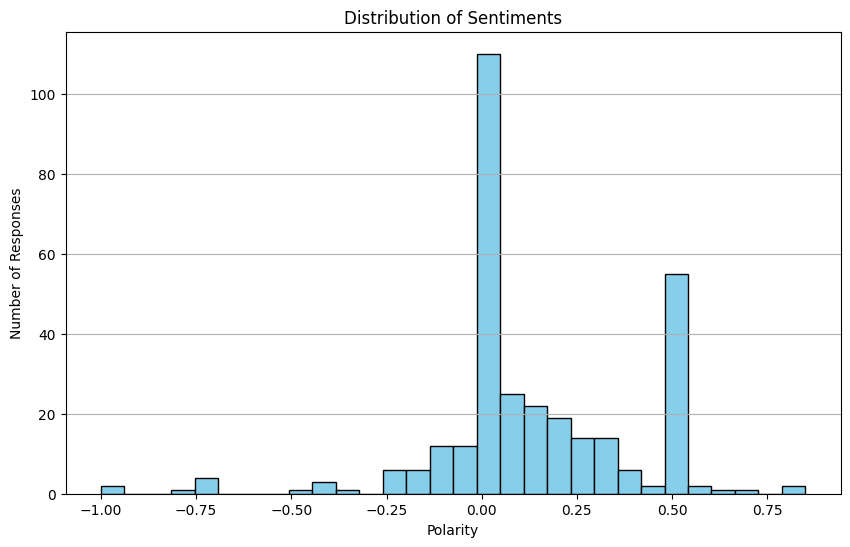

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["Polarity"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Polarity')
plt.ylabel('Number of Responses')
plt.title('Distribution of Sentiments')
plt.grid(axis='y')
plt.show()
